<a href="https://colab.research.google.com/github/Keerthi629/MINI-PROJECT/blob/main/IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("lotus",limit=50,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.hdwallpapers.in/download/water_lily_5k-1280x720.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://weneedfun.com/wp-content/uploads/2016/01/Orchid-Flower-30.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://tattoomagz.com/wp-content/uploads/Tattoos/tattoo-tattoo-ideas-flower-tattoo/Black-foot-lotus-flower-tattoo.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://weneedfun.com/wp-content/uploads/2016/02/Seoul-19.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.splendidhabitat.com/wp-content/uploads/2015/01/solid_copper_ceiling_tiles-510x765.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.lotussculpture.com/mm5/graphics/00000001/1kamakura1%20buddha.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.hdcarwallpapers.com/download/bmw_m8_gte_2018_2-1280x720.jpg
[%] File Downloaded !

[%] Downl

In [ ]:
downloader.download("tennis ball",limit=50,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.youthwork-practice.com/games/game-pictures/Summer-Olympic-Discipline-Ball-throwing.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www2.mes-coloriages-preferes.biz/colorino/Images/Large/Personnages-celebres-Mangas-Dragon-Ball-Freezer-2673.png
[%] File Downloaded !

[%] Downloading Image #3 from https://www.swr.de/-/id=19225568/property=full/4kfm23/5 Min fit Standwaage.jpg
[!] Issue getting: https://www.swr.de/-/id=19225568/property=full/4kfm23/5 Min fit Standwaage.jpg
[!] Error:: URL can't contain control characters. '/-/id=19225568/property=full/4kfm23/5 Min fit Standwaage.jpg' (found at least ' ')
[%] Downloading Image #3 from http://www2.mes-coloriages-preferes.biz/colorino/Images/Large/Personnages-celebres-Mangas-Dragon-Ball-Son-Goku-71258.png
[%] File Downloaded !

[%] Downloading Image #4 from http://bitcoinist.com/wp-content/uploads/2017/07/ico-ticking-timebomb.jp

In [ ]:
downloader.download("ice cream cone",limit=50,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.craftymorning.com/wp-content/uploads/2016/05/cotton-candy-cones-party-favor.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://zolpwsuwoq-flywheel.netdna-ssl.com/wp-content/uploads/2017/09/boys-ice-cream-party-ideas.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.bravotv.com/sites/bravo/files/field_blog_image/2016/04/the-feast-overflowing-ice-cream-promote.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://c.stocksy.com/a/uDH400/z9/1019522.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.businesstoday.lk/cpanel/uploader/3128/Cargills-Mafic-Ice-1.jpg.JPEG
[%] File Downloaded !

[%] Downloading Image #6 from https://images.firstwefeast.com/complex/image/upload/f_auto,fl_lossy,q_auto,w_1200/r0jfkuo7cd2ovwxpygmr
[%] File Downloaded !

[%] Downloading Image #7 from https://belgique.co.uk/shop/517-thickbox_default/dripping-ca

In [ ]:
# Preprocessing
# 1. Resize
# 2. Flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['lotus','tennis ball','ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
# Split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=165)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2,
       2])

In [ ]:
y_test

array([2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2,
       2])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
confusion_matrix(y_pred,y_test)

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 18]])

In [ ]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://th.bing.com/th/id/OIP.2UUn_sMdhnJ-MM8CawDELwHaNH?w=182&h=323&c=7&o=5&pid=1.7
(323, 182, 3)
 PREDICTED OUTPUT: ice cream cone


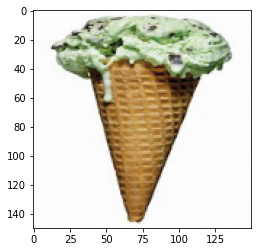

In [ ]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')